In [33]:
import pandas as pd
from bs4 import BeautifulSoup
from IPython import display
import os

In [34]:
"htmls/page1.html"

'htmls/page1.html'

In [35]:
def read_html_page(name):#create function
    with open(name) as f:
        content=f.read()

    soup = BeautifulSoup(content,"html.parser")
    h3s = soup.find_all("h3")

    for h3 in h3s:
        print(h3.find("a")["title"])
        display.clear_output(wait=True)
    articles = soup.find_all("article", class_="product_pod")
    items = []
    for article in articles:
        title = article.find("h3").find("a")["title"]
        price = article.select_one("p.price_color").text.split("£")[1]
        rating = article.find("p", class_="star-rating")["class"][1]
        availability = article.find("p", class_="instock availability").get_text(strip=True)
        items.append([title,price,rating,availability])

    df=pd.DataFrame(items,columns=["book_title","price","rating","stock_availability"])
    return df

In [36]:
read_html_page("htmls/page1.html")

,book_title,price,rating,stock_availability
0,A Light in the Attic,51.77,Three,In stock
1,Tipping the Velvet,53.74,One,In stock
2,Soumission,50.10,One,In stock
3,Sharp Objects,47.82,Four,In stock
4,Sapiens: A Brief History of Humankind,54.23,Five,In stock
5,The Requiem Red,22.65,One,In stock
6,The Dirty Little Secrets of Getting Your Dream...,33.34,Four,In stock
7,The Coming Woman: A Novel Based on the Life of...,17.93,Three,In stock
8,The Boys in the Boat: Nine Americans and Their...,22.60,Four,In stock
9,The Black Maria,52.15,One,In stock


In [37]:
combined_data = pd.DataFrame()
for i in range(len([f for f in os.listdir("htmls") if os.path.isfile(os.path.join("htmls", f))])+1):
    try:
        data = read_html_page(f"htmls/page{i}.html")
        if combined_data.empty:
            combined_data = data.copy()
        else:
            combined_data = pd.concat([combined_data,data],ignore_index=True)
        print(f"htmls/page{i}.html : Read Successfully")
    except Exception as e:
        print(e)

htmls/page50.html : Read Successfully
[Errno 2] No such file or directory: 'htmls/page51.html'


In [38]:
combined_data

,book_title,price,rating,stock_availability
0,A Light in the Attic,51.77,Three,In stock
1,Tipping the Velvet,53.74,One,In stock
2,Soumission,50.10,One,In stock
3,Sharp Objects,47.82,Four,In stock
4,Sapiens: A Brief History of Humankind,54.23,Five,In stock
...,...,...,...,...
975,Alice in Wonderland (Alice's Adventures in Won...,55.53,One,In stock
976,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,Four,In stock
977,A Spy's Devotion (The Regency Spies of London #1),16.97,Five,In stock
978,1st to Die (Women's Murder Club #1),53.98,One,In stock


In [39]:
df=pd.read_csv("new_data3.csv")

In [40]:
df

,book_title,price,rating,stock_availability
0,A Light in the Attic,51.77,Three,In stock
1,Tipping the Velvet,53.74,One,In stock
2,Soumission,50.10,One,In stock
3,Sharp Objects,47.82,Four,In stock
4,Sapiens: A Brief History of Humankind,54.23,Five,In stock
...,...,...,...,...
975,Alice in Wonderland (Alice's Adventures in Won...,55.53,One,In stock
976,"Ajin: Demi-Human, Volume 1 (Ajin: Demi-Human #1)",57.06,Four,In stock
977,A Spy's Devotion (The Regency Spies of London #1),16.97,Five,In stock
978,1st to Die (Women's Murder Club #1),53.98,One,In stock


In [41]:
top5_expensive = df.sort_values(by="price", ascending=False).head(5)
print(top5_expensive[["book_title", "price"]])


                             book_title  price
628  The Perfect Play (Play by Play #1)  59.99
597   Last One Home (New Beginnings #1)  59.98
840    Civilization and Its Discontents  59.95
540      The Barefoot Contessa Cookbook  59.92
346           The Diary of a Young Girl  59.90


In [42]:
top5_cheap = df.sort_values(by="price", ascending=True).head(5)
print(top5_cheap[["book_title", "price"]])


                                            book_title  price
618                         An Abundance of Katherines  10.00
481                              The Origin of Species  10.01
696  The Tipping Point: How Little Things Can Make ...  10.02
84                                            Patience  10.16
282                               Greek Mythic History  10.23


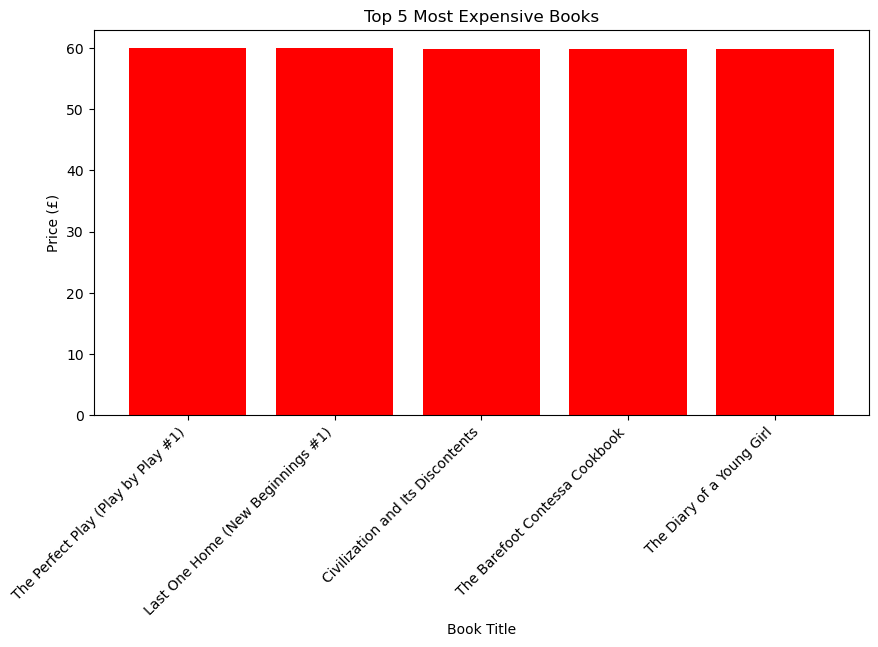

In [13]:
import matplotlib.pyplot  as plt
# Sort descending and take top 5
top5_expensive = df.sort_values(by="price", ascending=False).head(5)

plt.figure(figsize=(10,5))
plt.bar(top5_expensive["book_title"], top5_expensive["price"], color="red")
plt.title("Top 5 Most Expensive Books")
plt.xlabel("Book Title")
plt.ylabel("Price (£)")
plt.xticks(rotation=45, ha="right")  # rotate titles for readability
plt.show()


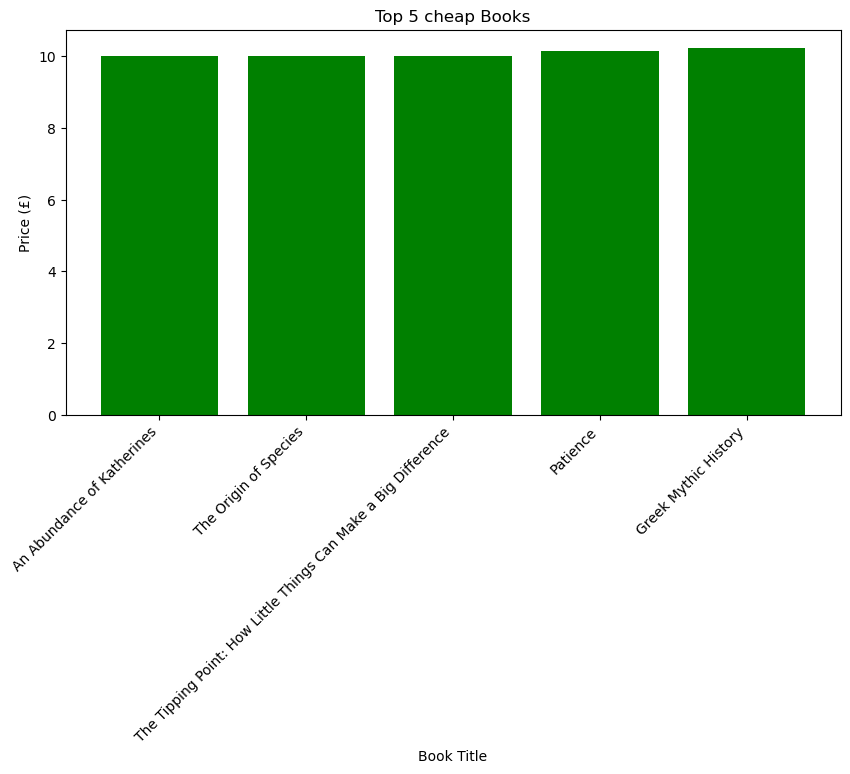

In [14]:
top5_expensive = df.sort_values(by="price", ascending=True).head(5)

plt.figure(figsize=(10,5))
plt.bar(top5_cheap["book_title"], top5_cheap["price"], color="green")
plt.title("Top 5 cheap Books")
plt.xlabel("Book Title")
plt.ylabel("Price (£)")
plt.xticks(rotation=45, ha="right")  # rotate titles for readability
plt.show()

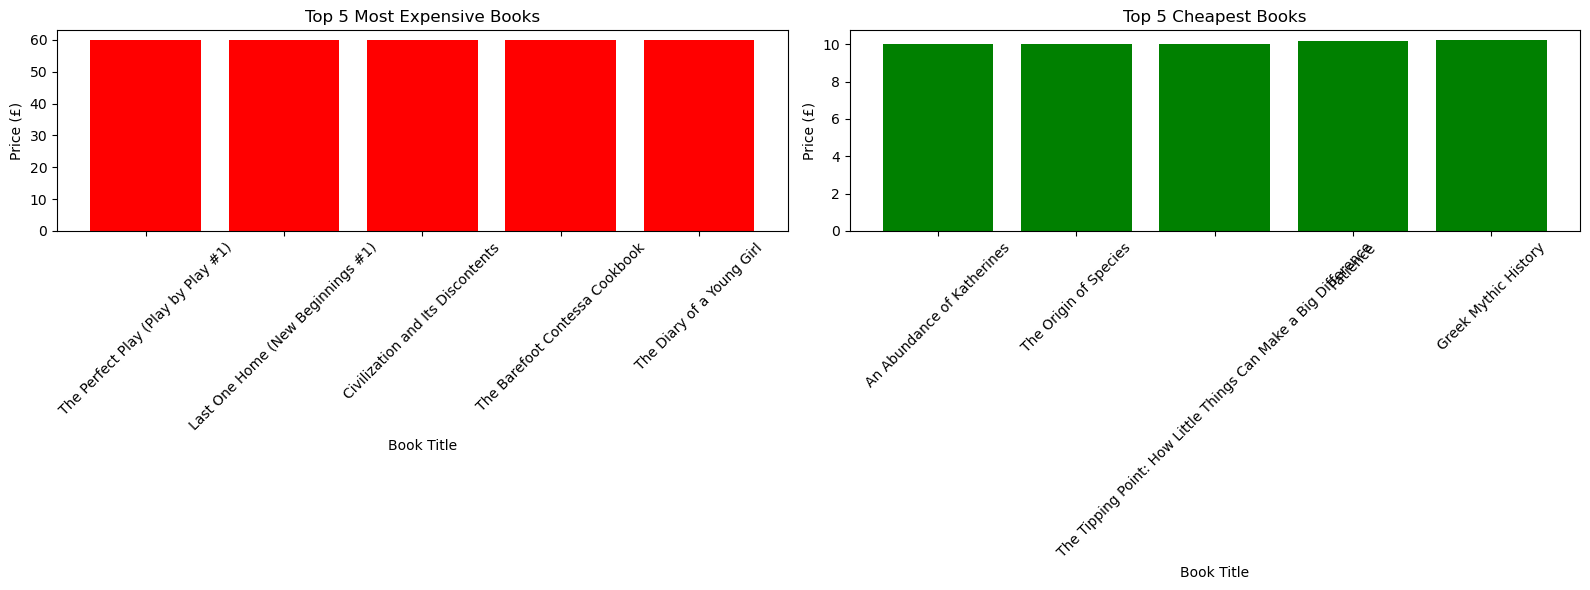

In [16]:
import matplotlib.pyplot as plt

# Prepare datasets
top5_expensive = df.sort_values(by="price", ascending=False).head(5)
top5_cheapest = df.sort_values(by="price", ascending=True).head(5)

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16,6))

# ---- Left subplot: Most Expensive ----
axes[0].bar(top5_expensive["book_title"], top5_expensive["price"], color="red")
axes[0].set_title("Top 5 Most Expensive Books")
axes[0].set_xlabel("Book Title")
axes[0].set_ylabel("Price (£)")
axes[0].tick_params(axis="x", rotation=45)

# ---- Right subplot: Cheapest ----
axes[1].bar(top5_cheapest["book_title"], top5_cheapest["price"], color="green")
axes[1].set_title("Top 5 Cheapest Books")
axes[1].set_xlabel("Book Title")
axes[1].set_ylabel("Price (£)")
axes[1].tick_params(axis="x", rotation=45)

# Adjust layout
plt.tight_layout()

# Save as PNG (high quality)
plt.savefig("books_price_analysis.png", dpi=300, bbox_inches="tight")

# Show on screen
plt.show()


In [32]:
from reportlab.lib.pagesizes import letter
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image, Table, TableStyle
from reportlab.lib.styles import getSampleStyleSheet
from reportlab.lib import colors
import pandas as pd

# Load your dataset
df = pd.read_csv("new_data3.csv")

# Create PDF
pdf = SimpleDocTemplate("Books_Report.pdf", pagesize=letter)
styles = getSampleStyleSheet()
elements = []

# Title
elements.append(Paragraph("📚 Books to Scrape - Data Analysis Report", styles['Title']))
elements.append(Spacer(1, 20))

# Summary
summary_text = f"""
This report contains data scraped from the <b>Books to Scrape</b> website.  
A total of <b>{len(df)}</b> books were collected.  
Below are insights highlighting the <b>top 5 most expensive</b> and <b>cheapest</b> books, along with a price analysis chart.
"""
elements.append(Paragraph(summary_text, styles['Normal']))
elements.append(Spacer(1, 20))

# Function to style tables
def make_table(data):
    table = Table(data, colWidths=[300, 100])
    style = TableStyle([
        ('BACKGROUND', (0, 0), (-1, 0), colors.HexColor("#4CAF50")),  # header bg
        ('TEXTCOLOR', (0, 0), (-1, 0), colors.whitesmoke),           # header text
        ('ALIGN', (0, 0), (-1, -1), 'CENTER'),
        ('FONTNAME', (0, 0), (-1, 0), 'Helvetica-Bold'),
        ('BOTTOMPADDING', (0, 0), (-1, 0), 12),
        ('BACKGROUND', (0, 1), (-1, -1), colors.HexColor("#F9F9F9")),
        ('GRID', (0, 0), (-1, -1), 0.5, colors.grey),
    ])
    table.setStyle(style)
    return table

# Top 5 Expensive
top5_exp = df.sort_values(by="price", ascending=False).head(5)[["book_title","price"]]
elements.append(Paragraph("💰 Top 5 Most Expensive Books", styles['Heading2']))
data_exp = [top5_exp.columns.tolist()] + top5_exp.values.tolist()
elements.append(make_table(data_exp))
elements.append(Spacer(1, 20))

# Top 5 Cheapest
top5_cheap = df.sort_values(by="price", ascending=True).head(5)[["book_title","price"]]
elements.append(Paragraph("💸 Top 5 Cheapest Books", styles['Heading2']))
data_cheap = [top5_cheap.columns.tolist()] + top5_cheap.values.tolist()
elements.append(make_table(data_cheap))
elements.append(Spacer(1, 20))

# Insert Chart
elements.append(Paragraph("📊 Price Analysis Chart", styles['Heading2']))
elements.append(Image("books_price_analysis.png", width=450, height=280))
elements.append(Paragraph(" Books Availability chart", styles['Heading2']))
elements.append(Image("availability_books.png", width=450, height=280))
elements.append(Paragraph("Books rating chart", styles['Heading2']))
elements.append(Image("book_ratings.png", width=450, height=280))
# Build PDF
pdf.build(elements)


In [19]:
print(top5_cheap)

                                            book_title  price rating  \
618                         An Abundance of Katherines  10.00   Five   
481                              The Origin of Species  10.01   Four   
696  The Tipping Point: How Little Things Can Make ...  10.02    Two   
84                                            Patience  10.16  Three   
282                               Greek Mythic History  10.23   Five   

    stock_availability  
618           In stock  
481           In stock  
696           In stock  
84            In stock  
282           In stock  


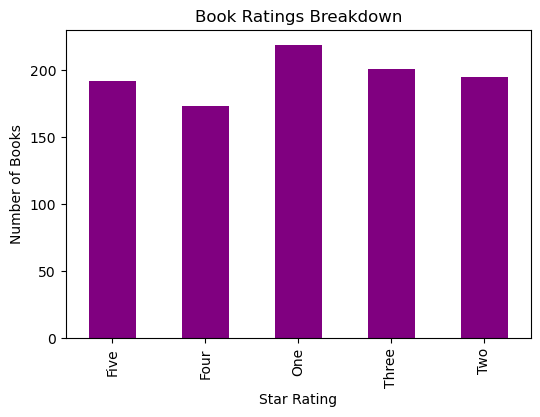

In [28]:
ratings_count = df["rating"].value_counts().sort_index()

plt.figure(figsize=(6,4))
ratings_count.plot(kind="bar", color="purple")
plt.title("Book Ratings Breakdown")
plt.xlabel("Star Rating")
plt.ylabel("Number of Books")
plt.savefig("book_ratings.png", dpi=300, bbox_inches="tight")
plt.show()


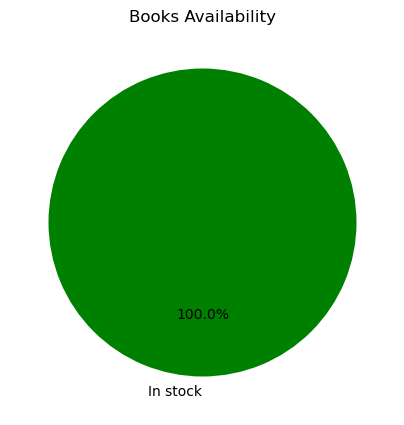

In [30]:
availability_count = df["stock_availability"].value_counts()

plt.figure(figsize=(5,5))
availability_count.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["green","red"])
plt.title("Books Availability")
plt.ylabel("")

plt.savefig("availability_books", dpi=300, bbox_inches="tight")
plt.show()
